/var/folders/q8/8t3lfc9d7t97bsq581_lr9780000gn/T/ipykernel_1750/505674178.py:13: RuntimeWarning: overflow encountered in exp
  return np.exp(-0.5 * a * x**2 - (u/24) * x**4)
/var/folders/q8/8t3lfc9d7t97bsq581_lr9780000gn/T/ipykernel_1750/505674178.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  approx = np.sqrt(2 * np.pi / A) * np.exp(-a / (2*A) - u / (8*A**2) + 1/2)
/var/folders/q8/8t3lfc9d7t97bsq581_lr9780000gn/T/ipykernel_1750/505674178.py:18: RuntimeWarning: invalid value encountered in scalar divide
  approx = np.sqrt(2 * np.pi / A) * np.exp(-a / (2*A) - u / (8*A**2) + 1/2)
/var/folders/q8/8t3lfc9d7t97bsq581_lr9780000gn/T/ipykernel_1750/505674178.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(exact, -np.inf, np.inf, args=(a_val, u_val), limit=100)


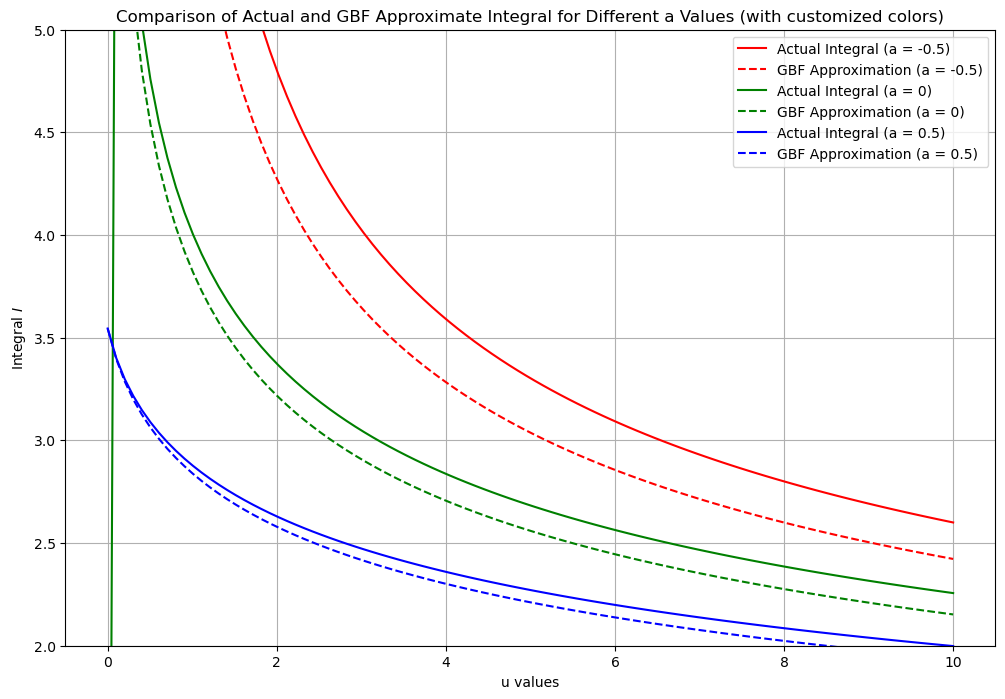

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, IntegrationWarning

# Define the range for u
u_range = np.linspace(0.0, 10, 100)

# Parameters a for each condition
a_values = [-0.5, 0, 0.5]

# Define the actual integrand with safe checks
def exact(x, a, u):
    return np.exp(-0.5 * a * x**2 - (u/24) * x**4)

# Define the GBF approximate integral
def approximant(a, u):
    A = (a + np.sqrt(a**2 + 2*u)) / 2
    approx = np.sqrt(2 * np.pi / A) * np.exp(-a / (2*A) - u / (8*A**2) + 1/2)
    return approx

# Containers for numerical and GBF approximate results, with checks for safe computation
exact_results = {a_val: [] for a_val in a_values}
approx_results = {a_val: [] for a_val in a_values}

# Calculate the numerical and GBF approximate integrals for each a and range of u
for a_val in a_values:
    for u_val in u_range:
        # Numerical integration with error handling
        result, _ = quad(exact, -np.inf, np.inf, args=(a_val, u_val), limit=100)
        exact_results[a_val].append(result)

        # GBF approximate integral with error handling
        gbf_approx_val = approximant(a_val, u_val)
        approx_results[a_val].append(gbf_approx_val)

# Plot the results with error handling and customized colors
plt.figure(figsize=(12, 8))

# Define custom colors for clarity
colors = ['red', 'green', 'blue']

for idx, a_val in enumerate(a_values):
    actual_color = colors[idx]  # Color for the actual integral
    gbf_color = colors[idx] + '--'  # Dashed line color for GBF approximation

    plt.plot(u_range, exact_results[a_val], label=f'Actual Integral (a = {a_val})', color=actual_color, linestyle='-', marker='')
    plt.plot(u_range, approx_results[a_val], label=f'GBF Approximation (a = {a_val})', color=actual_color, linestyle='--', marker='')

# make a limit on the vertical axis
plt.ylim(2, 5)
plt.xlabel('u values')
plt.ylabel('Integral $I$')
plt.title('Comparison of Actual and GBF Approximate Integral for Different a Values (with customized colors)')
plt.legend()
plt.grid(True)
plt.savefig('gbf_approximation.png')


In [3]:
from sympy import *

# Define the symbols for this expression: f = -\frac{z\varepsilon}{6} (1 + 2S^2) + k_B T \left(\frac{2 - 2S}{3} \ln \frac{1 - S}{3} + \frac{1 + 2S}{3} \ln \frac{1 + 2S}{3}\right)
f, z, S, T, epsilon, k_B = symbols('f z S T \epsilon k_B')
f = -z * epsilon / 6 * (1 + 2 * S**2) + k_B * T * ((2 - 2 * S) / 3 * log((1 - S) / 3) + (1 + 2 * S) / 3 * log((1 + 2 * S) / 3))
# use this tailor expansion for the logarithm \ln \frac{1 - S}{3} = \ln (1 - S) - \ln 3 = -\ln 3 - S - \frac{S^2}{2} - \frac{S^3}{3} - \frac{S^4}{4} - \ldots and \ln \frac{1 + 2S}{3} = \ln (1 + 2S) - \ln 3 = -\ln 3 + 2S - \frac{4S^2}{2} + \frac{8S^3}{3} - \frac{16S^4}{4} + \ldots
f = f.subs(log((1 - S) / 3), -log(3) - S - S**2 / 2 - S**3 / 3 - S**4 / 4)
f = f.subs(log((1 + 2 * S) / 3), -log(3) + 2 * S - 4 * S**2 / 2 + 8 * S**3 / 3 - 16 * S**4 / 4)
# simplify the expression
f = simplify(f)
# print the expression
# print(latex(f))

# do this minimization: \frac{\partial f}{\partial S} = 0
f_prime = diff(f, S)
S_star = solve(f_prime, S)
# print the result
print(latex(f_prime))


- \frac{25 S^{4} T k_{B}}{2} + 2 S^{3} T k_{B} - S^{2} T k_{B} + 2 S T k_{B} - \frac{2 S \epsilon z}{3}
